In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [5]:
country_df = pd.read_csv("data/country_data.csv", encoding="latin-1")
country_df.head()

,Economy,Code,Region,Income group,Lending category,Other
0,Afghanistan,AFG,South Asia,Low income,IDA,HIPC
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,NaN
2,Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD,NaN
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,..,NaN
4,Andorra,AND,Europe & Central Asia,High income,..,NaN


<IPython.core.display.Javascript object>

In [6]:
def addIndicatorToMainTable(df, wb_df, indicator_df, short_code):

    df.dropna(axis=1, how="all", inplace=True)

    # add to indicator table
    indicator_cols = ["Indicator Name", "Indicator Code"]
    indic_df = df[indicator_cols].drop_duplicates()
    indic_df["Indicator Short Code"] = short_code
    indicator_df = indicator_df.append(indic_df, sort=False)

    # melt table
    df.drop(columns=indicator_cols, inplace=True)
    df_m = df.melt(
        id_vars=["Country Name", "Country Code"], var_name="year", value_name=short_code
    )

    # add to main table
    if len(wb_df.columns) == 2:
        wb_df = wb_df.merge(df_m, on=["Country Name", "Country Code"], how="outer")
    else:
        wb_df = wb_df.merge(
            df_m, on=["Country Name", "Country Code", "year"], how="outer"
        )
    return wb_df, indicator_df

<IPython.core.display.Javascript object>

In [11]:
indicator_list = ["GDP.MKTP", "GDP.PCAP", "CO2E.KT", "CO2E.PC", "GHGT.KT"]

<IPython.core.display.Javascript object>

False

<IPython.core.display.Javascript object>

In [14]:
indicator_df = pd.DataFrame(
    columns=["Indicator Name", "Indicator Code", "Indicator Short Code"]
)

# loop through tables and create wb_df and inidicator_df tables
for indic in indicator_list:
    for folder in os.listdir("data"):
        if indic in folder and "zip" not in folder:
            # print(folder)
            for file in os.listdir("data/" + folder):
                # print(file)
                df = pd.read_csv("data/{}/{}".format(folder, file), skiprows=4)
                #create wb_df if doesnt exist
                if "wb_df" not in locals():
                    wb_df = df[["Country Name", "Country Code"]]
                wb_df, indicator_df = addIndicatorToMainTable(
                    df, wb_df, indicator_df, short_code=indic
                )
                break

<IPython.core.display.Javascript object>

In [44]:
wb_df["year"] = wb_df["year"].astype("int")

<IPython.core.display.Javascript object>

In [80]:
indicator_df

,Indicator Name,Indicator Code,Indicator Short Code
0,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,GDP.MKTP
0,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,GDP.PCAP
0,CO2 emissions (kt),EN.ATM.CO2E.KT,CO2E.KT
0,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,CO2E.PC
0,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,GHGT.KT


<IPython.core.display.Javascript object>

In [45]:
wb_df = (
    wb_df.loc[
        (wb_df["Country Code"].isin(list(country_df["Code"]))) & (wb_df["year"] >= 1990)
    ]
    .sort_values(by="year")
    .reset_index(drop=True)
)
wb_df.head()

,Country Name,Country Code,year,GDP.MKTP,GDP.PCAP,CO2E.KT,CO2E.PC,GHGT.KT
0,Aruba,ABW,1990,1.497860e+09,24101.109429,1639.149,26.374503,NaN
1,Vanuatu,VUT,1990,2.425763e+08,1654.986462,66.006,0.450329,433.35203
2,Armenia,ARM,1990,8.592657e+09,2428.558960,NaN,NaN,24729.91660
3,Netherlands,NLD,1990,2.862524e+11,19145.386190,158403.399,10.594475,224468.08900
4,"Gambia, The",GMB,1990,8.962206e+08,937.868479,176.016,0.184196,1189.58850


<IPython.core.display.Javascript object>

In [106]:
def CO2vsGDPGraphs(cntry_code):

    cntry_df = wb_df.loc[wb_df["Country Code"] == cntry_code].reset_index(drop=True)
    cntry_name = cntry_df["Country Name"].unique().item()

    fig = plt.figure()
    ax = plt.axes()

    ax.plot(cntry_df["year"], cntry_df["CO2E.PC"], color="r")
    ax.set_ylabel("CO2 emissions per capita (ton)", color="r")

    ax2 = ax.twinx()
    ax2.plot(cntry_df["year"], cntry_df["GDP.PCAP"], color="b")
    ax2.set_ylabel("GDP per capita (current US$ - PPP)", color="b")
    ax.set_xticks(cntry_df.loc[::5, "year"])
    fig.text(0.9, 0.01, "source: World Bank", ha="right")
    fig.text(
        0.5,
        0.95,
        "{} CO2 Emissions and GDP per capita".format(cntry_name),
        weight="bold",
        size=14,
        ha="center",
    )
    fig.savefig(
        "graphs/{}_CO2_GDP_PCAP.jpg".format(cntry_code), dpi=200, bbox_inches="tight"
    )
    # plt.show()

<IPython.core.display.Javascript object>

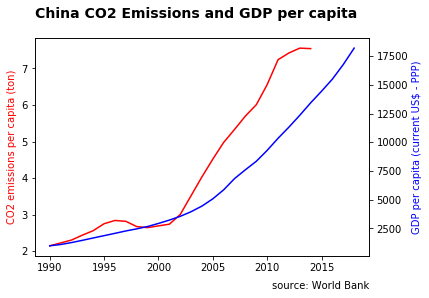

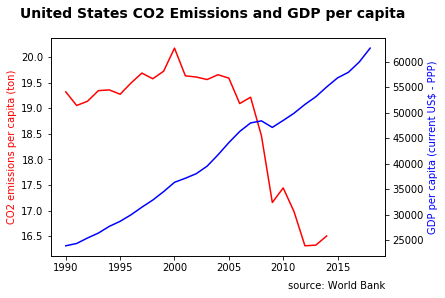

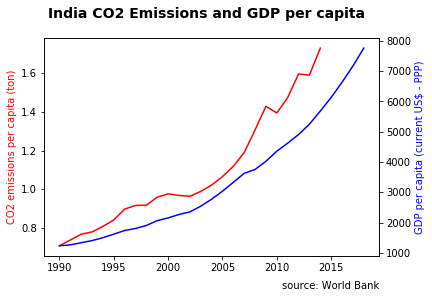

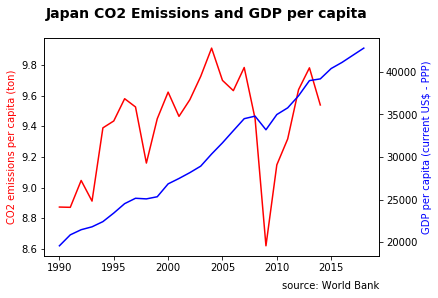

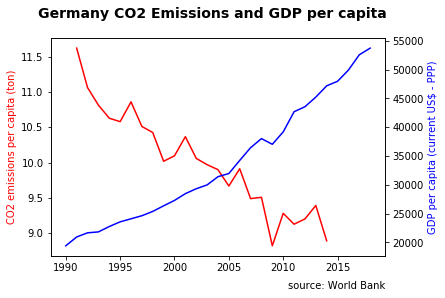

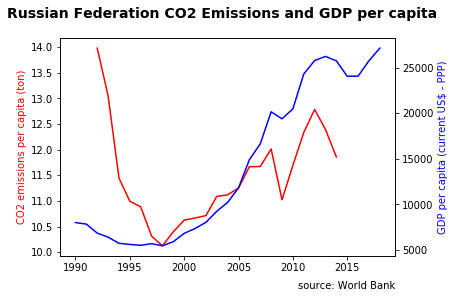

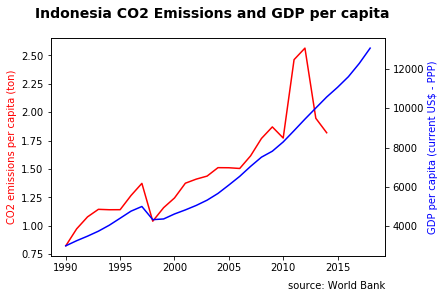

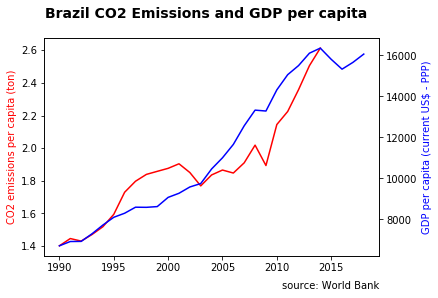

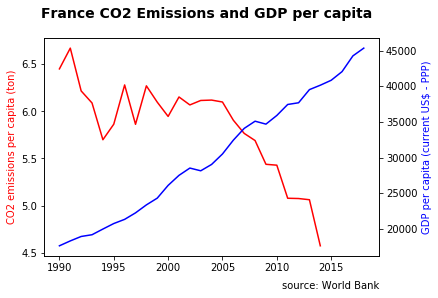

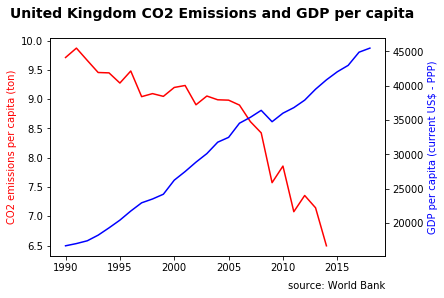

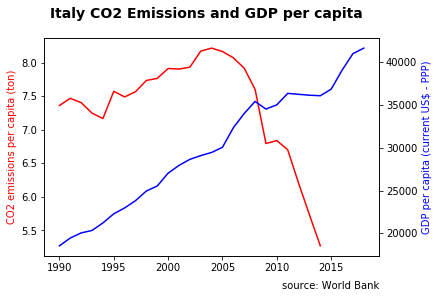

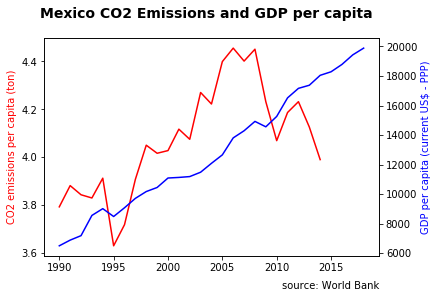

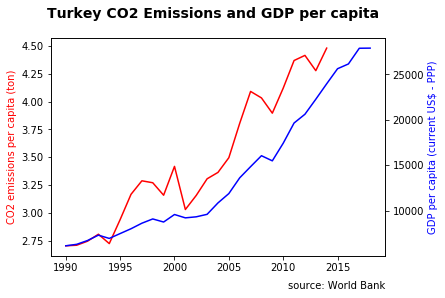

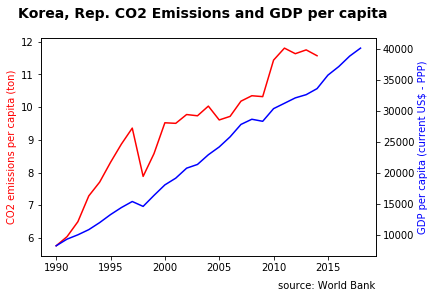

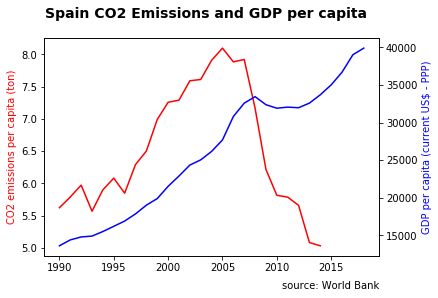

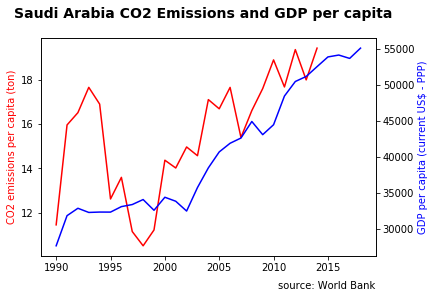

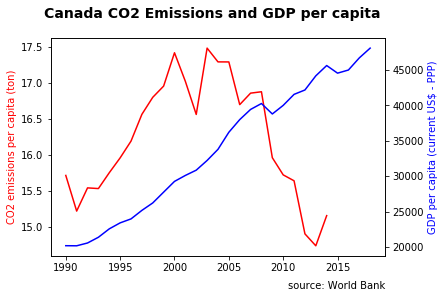

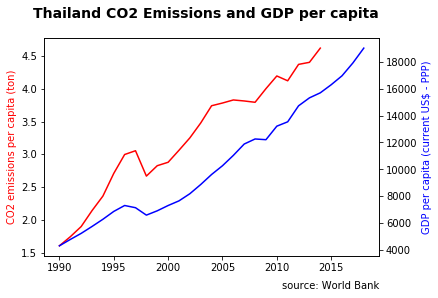

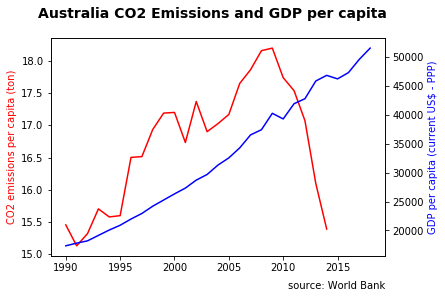

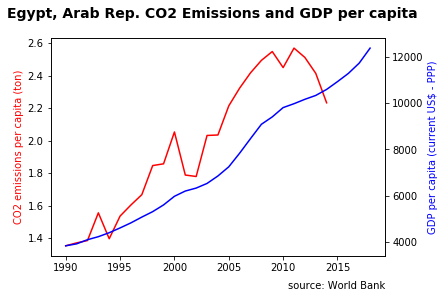

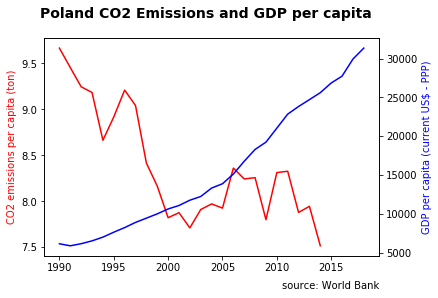

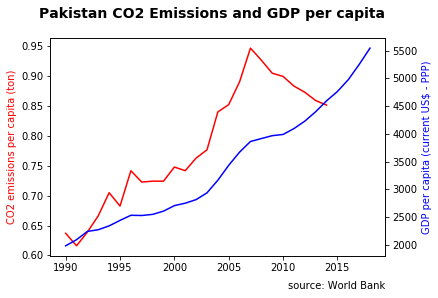

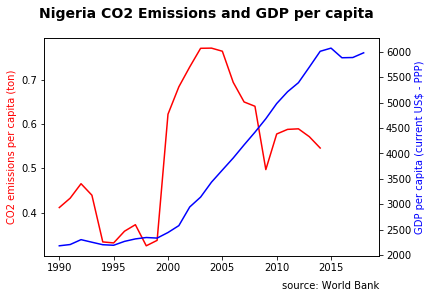

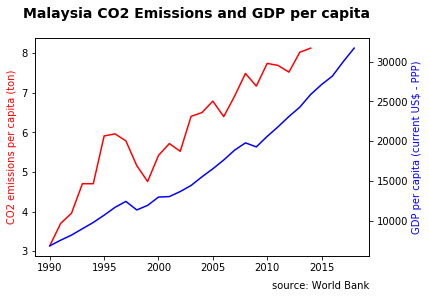

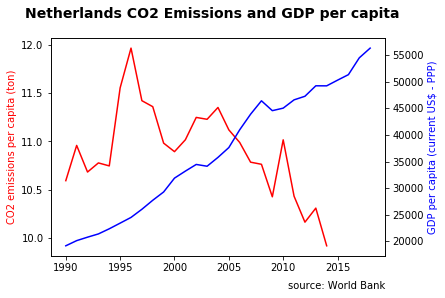

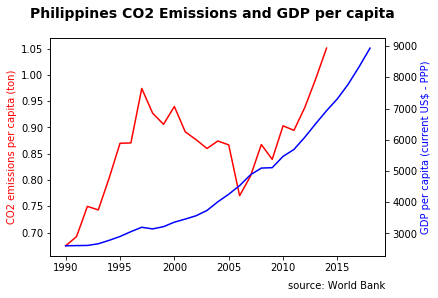

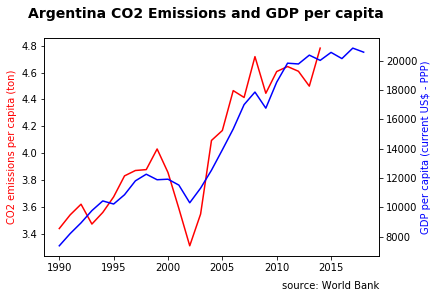

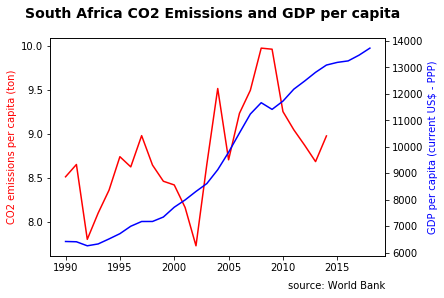

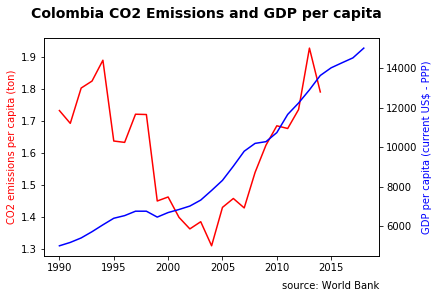

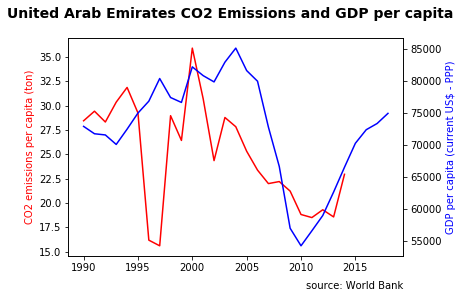

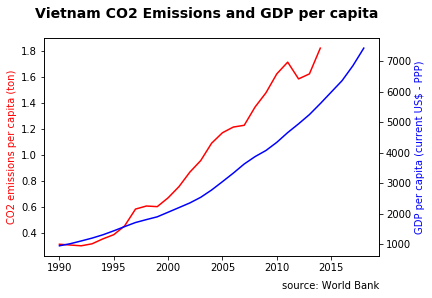

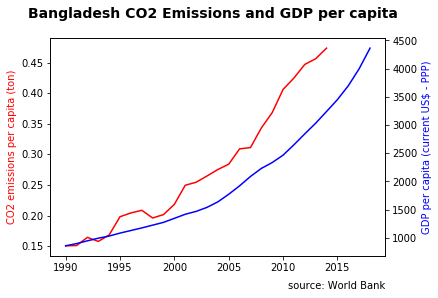

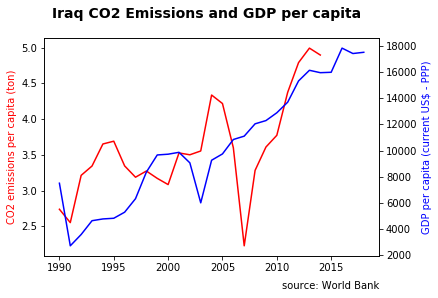

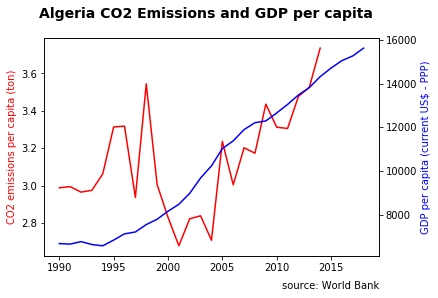

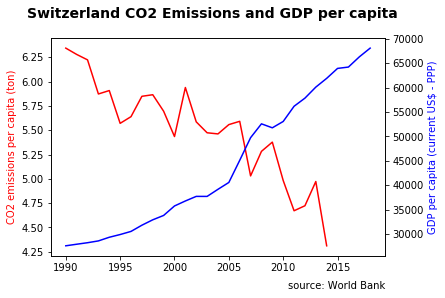

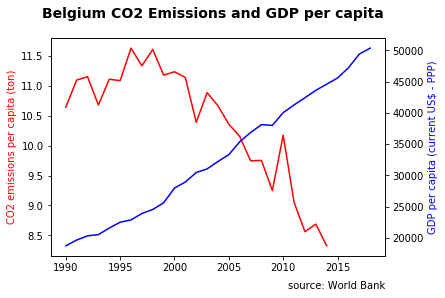

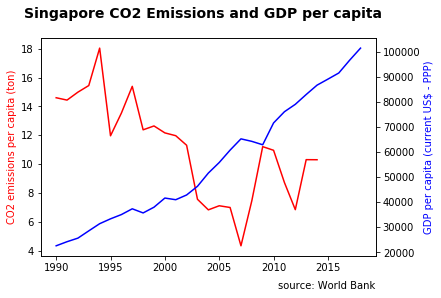

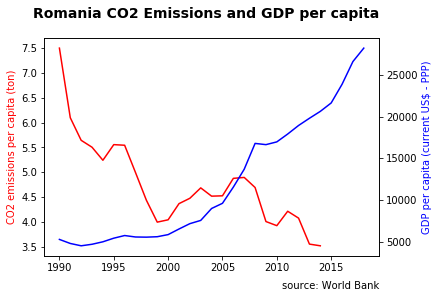

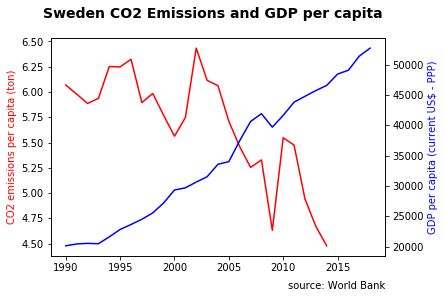

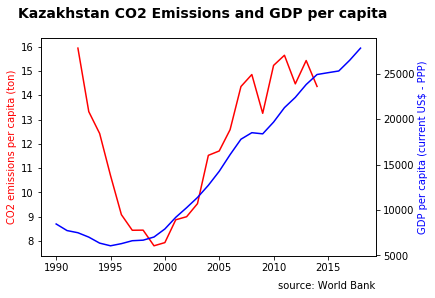

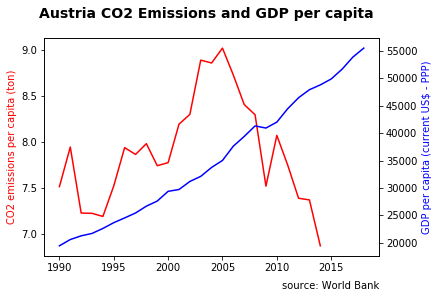

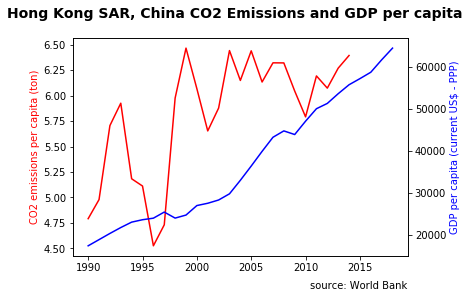

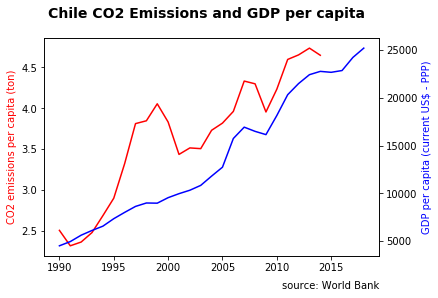

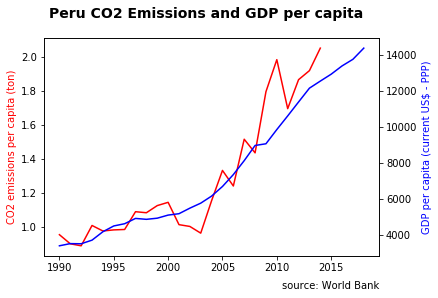

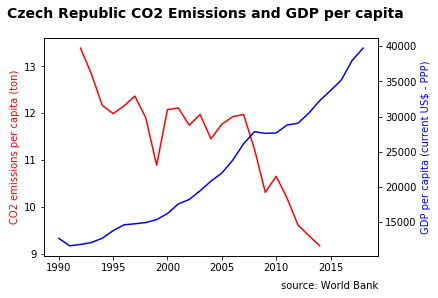

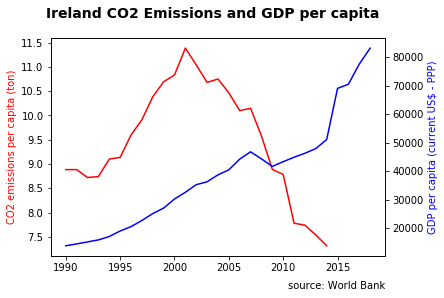

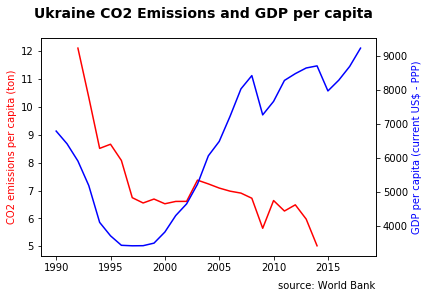

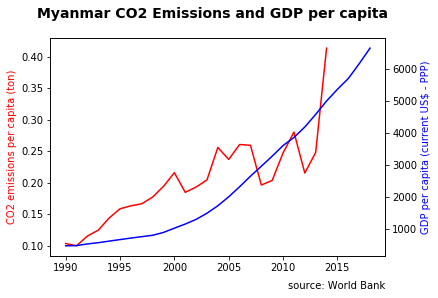

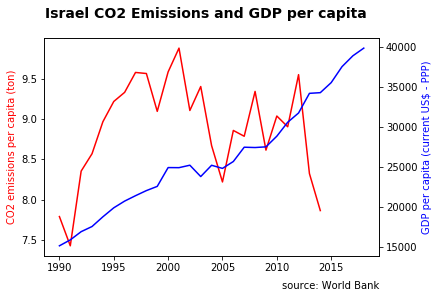

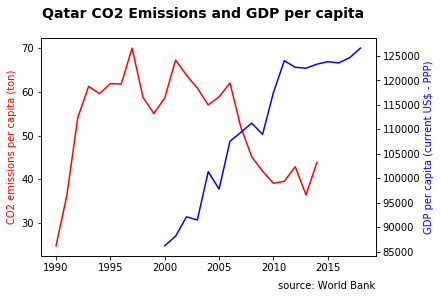

<IPython.core.display.Javascript object>

In [105]:
top50gdp = (
    wb_df.loc[wb_df.year == wb_df.year.max()]
    .sort_values(by="GDP.MKTP", ascending=False)
    .reset_index(drop=True)
    .iloc[0:50]
)
top50gdp["Country Code"]
for cntry_code in top50gdp["Country Code"]:
    CO2vsGDPGraphs(cntry_code)

In [33]:
us_df.loc[::5, "year"]

5887     1990
5892     1995
5897     2000
5902     2005
5907     2010
5912     2015
6713     1961
7798     1966
8883     1971
9968     1976
11053    1981
12138    1986
Name: year, dtype: object

<IPython.core.display.Javascript object>

In [18]:
top_gdp = wb_df.groupby(["Country Name", "Country Code"])[["GDP.PCAP"]].mean()
top_gdp.sort_values(by="GDP.PCAP", ascending=False)

,,GDP.PCAP
Country Name,Country Code,
Qatar,QAT,110667.738266
United Arab Emirates,ARE,72551.817441
Kuwait,KWT,71753.977392
Brunei Darussalam,BRN,71310.635413
Luxembourg,LUX,68065.304541
"Macao SAR, China",MAC,66881.002597
San Marino,SMR,66222.830300
Cayman Islands,CYM,65600.372810
Singapore,SGP,55832.844789


<IPython.core.display.Javascript object>